# Data Preprocessing

This file is all about how to preprocess data with pipelines in `scikit-learn`. I will be using the following modules:

 - `pandas`
 - `sklearn`
 - `matplotlib.pyplot`
 - `numpy`

I will be making visualizations and be potentially be making models that use these preprocessing techniques.

Let the fun begin.

In [2]:
# Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch dataset 
autism_screening_adult = fetch_ucirepo(id=426) 
  
# data (as pandas dataframes) 
X = autism_screening_adult.data.features 
y = autism_screening_adult.data.targets

df = pd.DataFrame(data = X, columns=autism_screening_adult.data.feature_names)
df['target'] = y
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,family_pdd,country_of_res,used_app_before,result,age_desc,relation,target
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


In [4]:
# Going to get some information about the varioables of the set
print(autism_screening_adult.variables)

               name     role         type  demographic description units  \
0          A1_Score  Feature      Integer         None        None  None   
1          A2_Score  Feature      Integer         None        None  None   
2          A3_Score  Feature      Integer         None        None  None   
3          A4_Score  Feature      Integer         None        None  None   
4          A5_Score  Feature      Integer         None        None  None   
5          A6_Score  Feature      Integer         None        None  None   
6          A7_Score  Feature      Integer         None        None  None   
7          A8_Score  Feature      Integer         None        None  None   
8          A9_Score  Feature      Integer         None        None  None   
9         A10_Score  Feature      Integer         None        None  None   
10              age  Feature      Integer          Age        None  None   
11           gender  Feature  Categorical       Gender        None  None   
12        et

In [5]:
# Going to do some data cleaning and then EDA
null_vals = df.isnull().sum()
shape = df.shape
print(null_vals, shape)

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jaundice            0
family_pdd          0
country_of_res      0
used_app_before     0
result              0
age_desc            0
relation           95
target              0
dtype: int64 (704, 21)


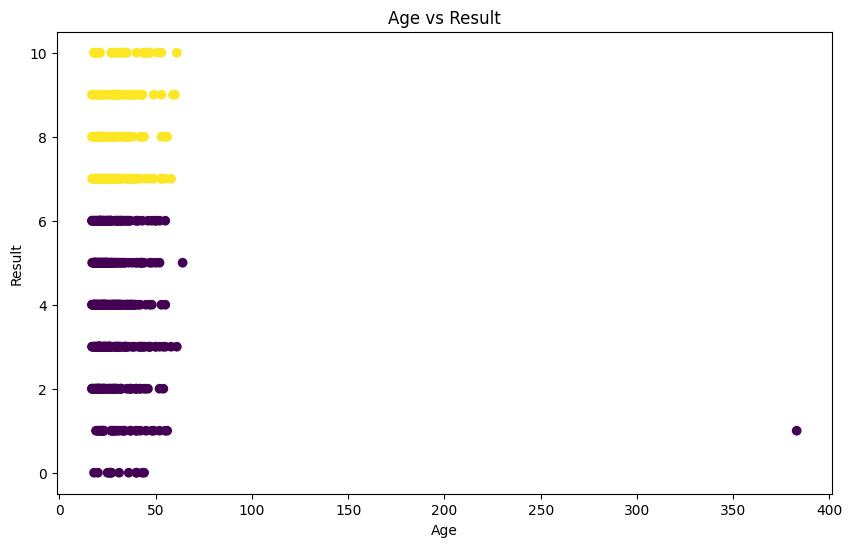

In [6]:
# Visualizing the Data

plt.figure(figsize = (10,6))
plt.scatter(df['age'], df['result'], c = df['target'].map({'YES': 1, 'NO': 0}), cmap = 'viridis')
plt.xlabel('Age')
plt.ylabel('Result')
plt.title('Age vs Result')
plt.show()

In [7]:
# Column Transformer
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
nominal_cols = df.select_dtypes(include=['object']).columns.tolist()
# ordinal_cols = df.select_dtypes(include=['object']).columns.tolist()  # if you have ordinal features, put their names here

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # or median, etc.
    ('scaler', StandardScaler())
])

# Nominal categorical pipeline
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Ordinal categorical pipeline (only if you have strictly ordinal features)
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

# Combine them in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('nom', nominal_transformer, nominal_cols),
        #('ord', ordinal_transformer, ordinal_cols),
    ],
    remainder='drop'  # or 'passthrough' if you want to keep other columns as is
)

In [8]:
# Split the Data into Train and Test Then Transform it

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
y_train = y_train.map({'YES': 1, 'NO': 0})
y_test = y_test.map({'YES': 1, 'NO': 0})

ValueError: A given column is not a column of the dataframe

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier())
])

model = GridSearchCV(pipe,
                     param_grid = {'model__n_estimators': [100, 500, 1000, 1500],
                                    'model__criterion': ['gini', 'entropy']
                                    },
                     cv = 5)

model.fit(X_train, y_train)